In [ ]:
import tensorflow as tf

fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

training_images = training_images / 255.0
test_images = test_images / 255.0

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from keras.layers.pooling.max_pooling2d import MaxPool2D
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(6, (5, 5), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.AveragePooling2D(),
  tf.keras.layers.Conv2D(16, (5, 5), activation='relu'),
  tf.keras.layers.AveragePooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(120, activation='relu'),
  tf.keras.layers.Dense(84, activation='relu'),
  tf.keras.layers.Dense(10, tf.nn.softmax)
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Train the model
print(f'\nMODEL TRAINING:')
history = model.fit(training_images, training_labels, epochs=20, validation_data=((test_images, test_labels)))

# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)


MODEL TRAINING:
Epoch 1/20
1875/1875 [==============================] - 40s 20ms/step - loss: 0.5946 - accuracy: 0.7761 - val_loss: 0.4597 - val_accuracy: 0.8323
Epoch 2/20
1875/1875 [==============================] - 36s 19ms/step - loss: 0.4080 - accuracy: 0.8486 - val_loss: 0.3970 - val_accuracy: 0.8533
Epoch 3/20
1875/1875 [==============================] - 35s 19ms/step - loss: 0.3449 - accuracy: 0.8718 - val_loss: 0.3466 - val_accuracy: 0.8715
Epoch 4/20
1875/1875 [==============================] - 37s 20ms/step - loss: 0.3086 - accuracy: 0.8855 - val_loss: 0.3301 - val_accuracy: 0.8794
Epoch 5/20
1875/1875 [==============================] - 36s 19ms/step - loss: 0.2836 - accuracy: 0.8943 - val_loss: 0.3018 - val_accuracy: 0.8907
Epoch 6/20
1875/1875 [==============================] - 35s 19ms/step - loss: 0.2636 - accuracy: 0.9019 - val_loss: 0.2952 - val_accuracy: 0.8905
Epoch 7/20
1875/1875 [==============================] - 38s 20ms/step - loss: 0.2467 - accuracy: 0.9079 - v

In [ ]:
from keras.layers.pooling.max_pooling2d import MaxPool2D
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(6, (5, 5), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.Dropout(.1),
  tf.keras.layers.AveragePooling2D(),
  tf.keras.layers.Conv2D(16, (5, 5), activation='relu'),
  tf.keras.layers.Dropout(.1),
  tf.keras.layers.AveragePooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, 'relu'),
  tf.keras.layers.Dropout(.1),
  tf.keras.layers.Dense(120, 'relu'),
  tf.keras.layers.Dropout(.1),
  tf.keras.layers.Dense(84, 'relu'),
  tf.keras.layers.Dense(10, tf.nn.softmax)
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Train the model
print(f'\nMODEL TRAINING:')
history_dropout = model.fit(training_images, training_labels, epochs=20, batch_size=32, validation_data=((test_images, test_labels)))

# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)


MODEL TRAINING:
Epoch 1/20
1875/1875 [==============================] - 43s 22ms/step - loss: 0.6099 - accuracy: 0.7666 - val_loss: 0.4445 - val_accuracy: 0.8338
Epoch 2/20
1875/1875 [==============================] - 45s 24ms/step - loss: 0.4110 - accuracy: 0.8474 - val_loss: 0.3680 - val_accuracy: 0.8676
Epoch 3/20
1875/1875 [==============================] - 44s 23ms/step - loss: 0.3539 - accuracy: 0.8693 - val_loss: 0.3478 - val_accuracy: 0.8679
Epoch 4/20
1875/1875 [==============================] - 42s 23ms/step - loss: 0.3220 - accuracy: 0.8809 - val_loss: 0.3155 - val_accuracy: 0.8892
Epoch 5/20
1875/1875 [==============================] - 43s 23ms/step - loss: 0.3031 - accuracy: 0.8875 - val_loss: 0.2988 - val_accuracy: 0.8893
Epoch 6/20
1875/1875 [==============================] - 43s 23ms/step - loss: 0.2881 - accuracy: 0.8931 - val_loss: 0.2841 - val_accuracy: 0.8952
Epoch 7/20
1875/1875 [==============================] - 43s 23ms/step - loss: 0.2737 - accuracy: 0.8988 - v

In [ ]:
from keras.layers.pooling.max_pooling2d import MaxPool2D
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(6, (5, 5), activation='relu', input_shape=(28, 28, 1), kernel_regularizer=tf.keras.regularizers.l2(0.0008)),  
  tf.keras.layers.AveragePooling2D(),
  tf.keras.layers.Conv2D(16, (5, 5), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0008)),
  tf.keras.layers.AveragePooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, 'relu', kernel_regularizer=tf.keras.regularizers.l2(0.0008)),
  tf.keras.layers.Dense(120, 'relu', kernel_regularizer=tf.keras.regularizers.l2(0.0008)),
  tf.keras.layers.Dense(84, 'relu', kernel_regularizer=tf.keras.regularizers.l2(0.0008)),
  tf.keras.layers.Dense(10, tf.nn.softmax)
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_L2 = model.fit(training_images, training_labels, epochs=20, batch_size=256, validation_data=((test_images, test_labels)))

Epoch 1/20
235/235 [==============================] - 29s 111ms/step - loss: 1.1069 - accuracy: 0.6875 - val_loss: 0.8847 - val_accuracy: 0.7429
Epoch 2/20
235/235 [==============================] - 24s 104ms/step - loss: 0.7730 - accuracy: 0.7797 - val_loss: 0.7463 - val_accuracy: 0.7897
Epoch 3/20
235/235 [==============================] - 25s 106ms/step - loss: 0.6868 - accuracy: 0.8108 - val_loss: 0.7150 - val_accuracy: 0.7932
Epoch 4/20
235/235 [==============================] - 28s 120ms/step - loss: 0.6296 - accuracy: 0.8299 - val_loss: 0.6227 - val_accuracy: 0.8379
Epoch 5/20
235/235 [==============================] - 25s 107ms/step - loss: 0.5852 - accuracy: 0.8432 - val_loss: 0.5903 - val_accuracy: 0.8454
Epoch 6/20
235/235 [==============================] - 24s 102ms/step - loss: 0.5531 - accuracy: 0.8519 - val_loss: 0.5486 - val_accuracy: 0.8559
Epoch 7/20
235/235 [==============================] - 25s 106ms/step - loss: 0.5230 - accuracy: 0.8604 - val_loss: 0.5511 - val_ac

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(6, (5, 5), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.BatchNormalization(axis=1),
  tf.keras.layers.AveragePooling2D(),
  tf.keras.layers.Conv2D(16, (5, 5), activation='relu'),
  tf.keras.layers.BatchNormalization(axis=1),
  tf.keras.layers.AveragePooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, 'relu'),
  tf.keras.layers.BatchNormalization(axis=1),
  tf.keras.layers.Dense(120, 'relu'),
  tf.keras.layers.BatchNormalization(axis=1),
  tf.keras.layers.Dense(84, 'relu'),
  tf.keras.layers.BatchNormalization(axis=1),
  tf.keras.layers.Dense(10, tf.nn.softmax)
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_BatchNorm = model.fit(training_images, training_labels, epochs=20, batch_size=256, validation_data=((test_images, test_labels)))

Epoch 1/20
235/235 [==============================] - 36s 144ms/step - loss: 0.5191 - accuracy: 0.8120 - val_loss: 1.3569 - val_accuracy: 0.4601
Epoch 2/20
235/235 [==============================] - 34s 147ms/step - loss: 0.3448 - accuracy: 0.8744 - val_loss: 0.4693 - val_accuracy: 0.8194
Epoch 3/20
235/235 [==============================] - 35s 149ms/step - loss: 0.3017 - accuracy: 0.8889 - val_loss: 0.4726 - val_accuracy: 0.8301
Epoch 4/20
235/235 [==============================] - 33s 140ms/step - loss: 0.2731 - accuracy: 0.9001 - val_loss: 0.3241 - val_accuracy: 0.8798
Epoch 5/20
235/235 [==============================] - 34s 145ms/step - loss: 0.2521 - accuracy: 0.9068 - val_loss: 0.3497 - val_accuracy: 0.8724
Epoch 6/20
235/235 [==============================] - 33s 140ms/step - loss: 0.2375 - accuracy: 0.9116 - val_loss: 0.3084 - val_accuracy: 0.8850
Epoch 7/20
235/235 [==============================] - 32s 136ms/step - loss: 0.2240 - accuracy: 0.9168 - val_loss: 0.3188 - val_ac

In [ ]:
x = range(20)

<ipython-input-36-b012ee7b6795>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)


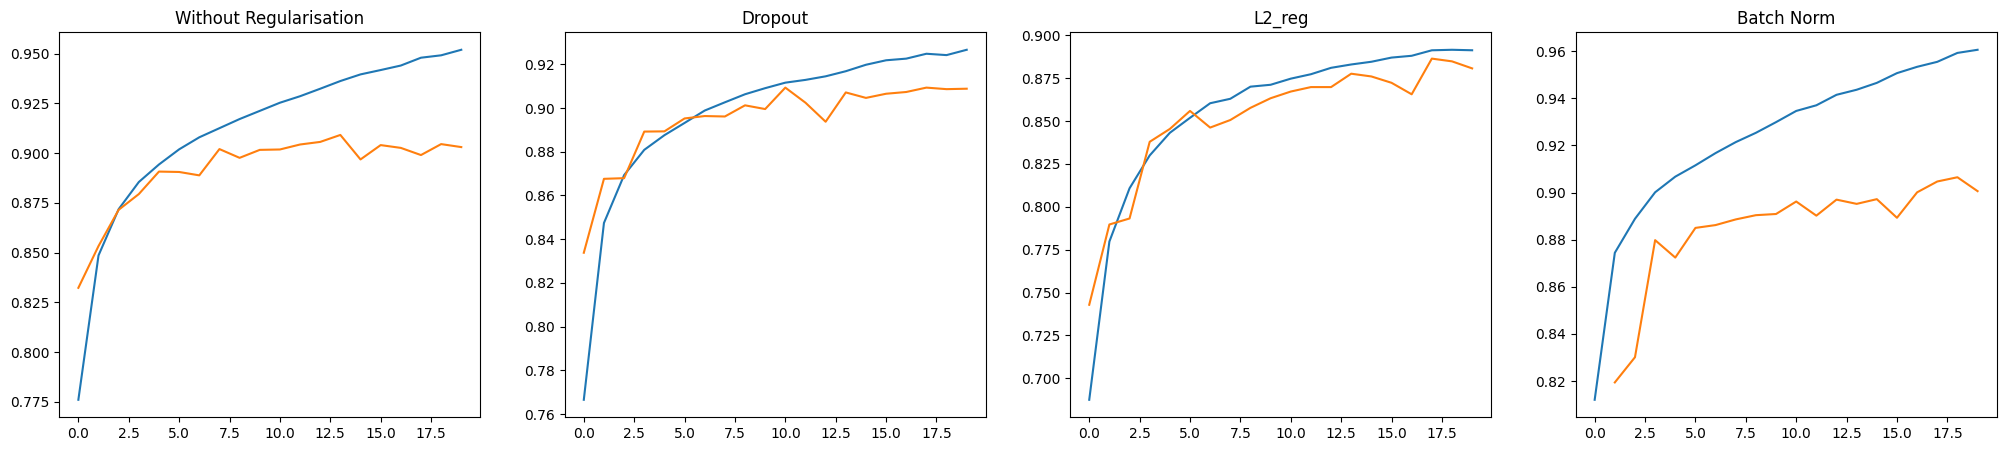

In [ ]:
plt.xlabel('epoch')
plt.ylabel('accuracy')
fig = plt.gcf()
fig.set_size_inches(25, 5)
plt.subplot(141)
plt.title("Without Regularisation")
plt.plot(x, history.history['accuracy'], x,  history.history['val_accuracy'])
plt.subplot(142)
plt.title("Dropout")
plt.plot(x, history_dropout.history['accuracy'], x, history_dropout.history['val_accuracy'])
plt.subplot(143)
plt.title("L2_reg")
plt.plot(x, history_L2.history['accuracy'], x, history_L2.history['val_accuracy'])
plt.subplot(144)
plt.title("Batch Norm")
plt.plot(x, history_BatchNorm.history['accuracy'], x[1:20],  history_BatchNorm.history['val_accuracy'][1:20])

\begin{array}{ccc}
Type&Regular&Dropout&L2Reg&BatchNorm\\
Train:Test&95:90&92.5:91&83:82&95:90
\end{array}